# HR Analytics: Job Change of Data Scientists
## Продолжение

In [ ]:
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [104]:
import pandas as pd

In [73]:
df = pd.read_csv('archive_unzip/aug_train.csv')

In [74]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Сводники

In [5]:
# рассчитываем процент (долю) тех, кто хочет сменить работу:

# это уже сводник, но сводник без группировки - по всему датасету:
df['target'].mean()

# показано, что 25% всех во всем датасете хочет сменить работу

0.24934753105752167

In [6]:
# делаем группировку по полу для параметра target и получаем срденее значение:
df.groupby('gender')['target'].mean()

gender
Female    0.263328
Male      0.227819
Other     0.261780
Name: target, dtype: float64

In [7]:
# Для того, чтобы избегать потерю данных - nan - необходимо учитывать пропуски:

df.groupby('gender', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [8]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


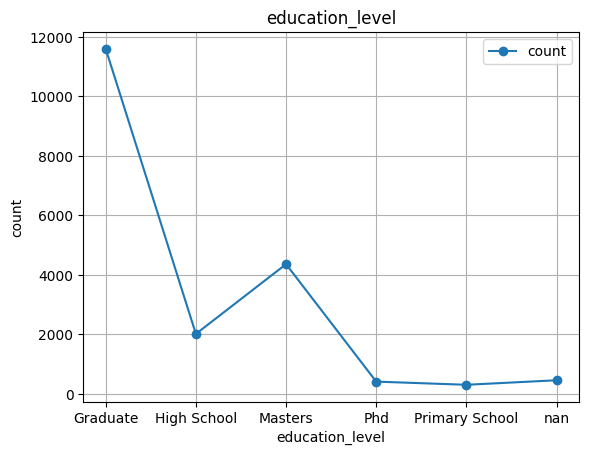

In [10]:
import matplotlib.pyplot as plt
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(marker = 'o')

plt.ylabel('count')
plt.title('education_level')
plt.grid()

Text(0.5, 1.0, 'education_level')

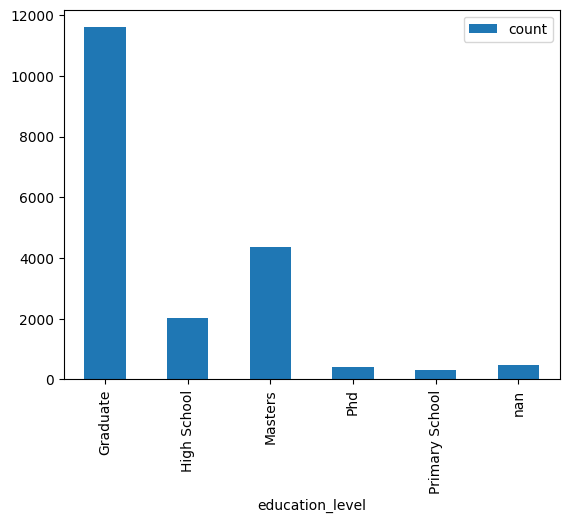

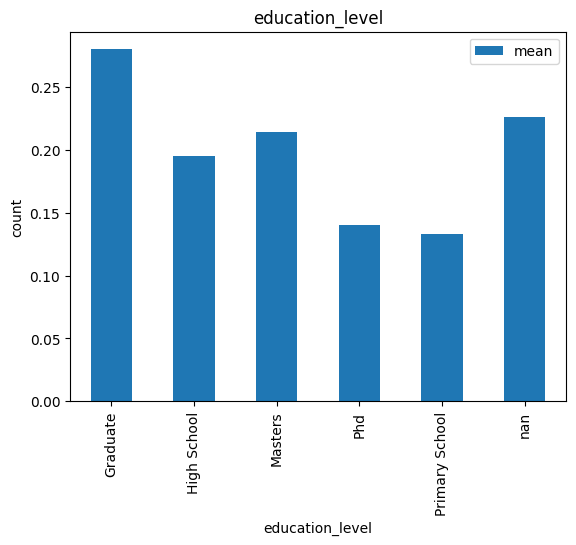

In [11]:
# Чтобы изменить тип графика на bar

# Пример кода:
df.groupby('education_level', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
df.groupby('education_level', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')

plt.ylabel('count')
plt.title('education_level')

# СВОДНИКИ ДЛЯ НЕПРЕРЫВНЫХ ПЕРЕМЕННЫХ

In [12]:
### Другой пример. Копируем ту же функцию, но с другой группировкой:

df.groupby('city_development_index', dropna = False)['target'].agg(['count', 'mean'])

# информация представляется не читаемой (много строк, без общей статистики):

,count,mean
city_development_index,,
0.448,17,0.647059
0.479,28,0.535714
0.487,5,0.800000
0.493,13,0.538462
0.512,5,0.600000
...,...,...
0.924,301,0.093023
0.925,171,0.140351
0.926,1336,0.099551


In [13]:
# Для того, чтобы анализировать непрерывную переменную - ее надо побить на интервалы:

pd.cut(df['city_development_index'], 5) 

# это пример того, как работает гистограмма - непрервыную переменную бъет на 5 интервалов - равных по длине

0        (0.849, 0.949]
1        (0.749, 0.849]
2        (0.548, 0.648]
3        (0.749, 0.849]
4        (0.749, 0.849]
              ...      
19153    (0.849, 0.949]
19154    (0.849, 0.949]
19155    (0.849, 0.949]
19156    (0.749, 0.849]
19157    (0.849, 0.949]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.447, 0.548] < (0.548, 0.648] < (0.648, 0.749] < (0.749, 0.849] < (0.849, 0.949]]

In [14]:
# такое разбиение на интервалы можно передать в переменную:

df['city_development_index_group'] = pd.cut(df['city_development_index'], 5) 

In [15]:
# сейчас уже можно сгруппировать по этой переменной и смотреть статистику по этим группам:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean', 'count'])

,mean,count
city_development_index_group,,
"(0.447, 0.548]",0.578652,178
"(0.548, 0.648]",0.582651,3297
"(0.648, 0.749]",0.273381,1529
"(0.749, 0.849]",0.194459,1949
"(0.849, 0.949]",0.160262,12205


<Axes: xlabel='city_development_index_group'>

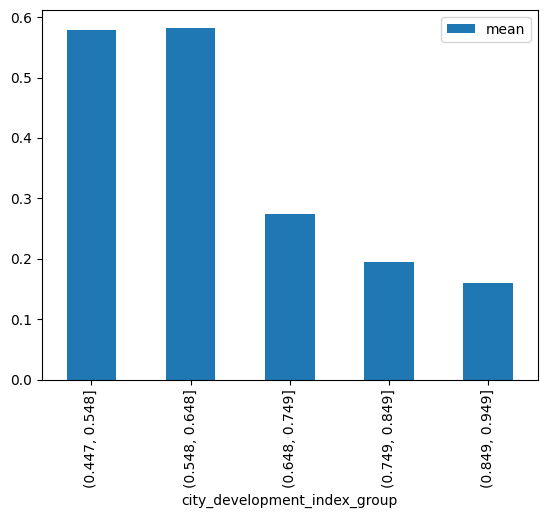

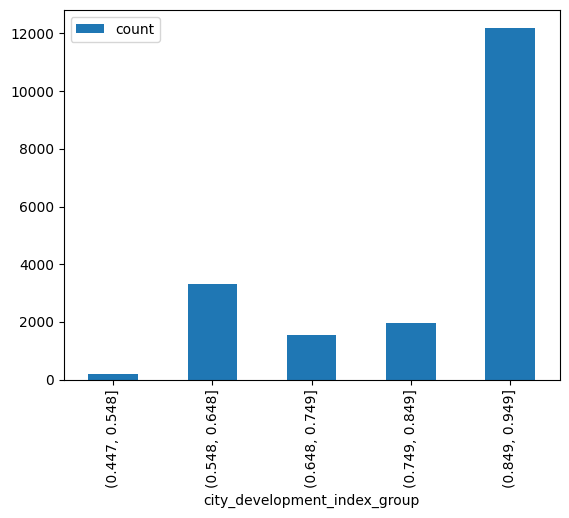

In [16]:
# и строить графики:

df.groupby('city_development_index_group', dropna = False)['target'].agg(['mean']).plot(kind = 'bar')
# дает процент людей для этой группы, которые соответствуют таргету - хотят поменять работу

df.groupby('city_development_index_group', dropna = False)['target'].agg(['count']).plot(kind = 'bar')
# дает количество людей живущих в этих группах

# Функция Pivot Table

#### Чаще всего pivot_table используется тогда, когда надо сделать HEATMAP

In [25]:
def education_group(x):
    if x in ['High School', 'Primary School']:
        return 'School'
    elif x in ['Masters', 'Phd']:
        return 'Masters & Phd'
    else:
        return x
    
    
df['education_level'].apply(education_group)

0             Graduate
1             Graduate
2             Graduate
3             Graduate
4        Masters & Phd
             ...      
19153         Graduate
19154         Graduate
19155         Graduate
19156           School
19157           School
Name: education_level, Length: 19158, dtype: object

In [26]:
# создаем новый столбец df['new_education_level'] в нашем df
df['new_education_level'] = df['education_level'].apply(education_group)

In [27]:
# делаем группировку по столбцу df['new_education_level'] с ориентацией на таргет

df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097


In [28]:
# для того, чтобы отобразить строки с nan - надо вручную заполнить строки с nan:

df['new_education_level'] = df['new_education_level'].fillna('no_info')

In [29]:
# у pivot_table есть очень крутая фича:

# добавлять столбцы для группироуки в сводную таблицу и оценивать уже комбинацию признаков

# например: здесь идет оценка уровня образования для таргет = 1 или 0
df.pivot_table(index = df['new_education_level'], values = 'target', aggfunc = ['count', 'mean'])

,count,mean
,target,target
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [30]:
df.groupby(df['new_education_level'], dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [31]:
# здесь добавим признак по которому хотим дополнительно группировать 'gender':

df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['count', 'mean'])

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters & Phd          386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128
no_info                  8   242     9  0.125000  0.169421  0.222222

In [32]:
# groupby может запускать новые признаки в строки, а в стоблцы не может:
# вот исходный вариант:
df.groupby(df['new_education_level']) ['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters & Phd,4775,0.207958
School,2325,0.187097
no_info,460,0.226087


In [33]:
# вот группировка с доп.параметрами:
df.groupby(['new_education_level','gender'], dropna = False) ['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters & Phd       Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
no_info             Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

In [34]:
# убрать мульти индекс пригодится также при работе с groupby (смотри выше)

# это пригодится, когда целевой параметр не только ['target']:

df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])


target           city_development_index          
                     count      mean                  count      mean
new_education_level                                                  
Graduate             11598  0.279790                  11598  0.823731
Masters & Phd         4775  0.207958                   4775  0.840032
School                2325  0.187097                   2325  0.836080
no_info                460  0.226087                    460  0.805207

In [35]:
# для примера здесь:
t = df.groupby(['new_education_level'], dropna = False) [['target', 'city_development_index']].agg(['count', 'mean'])

In [36]:
t.columns = [' '.join(col).strip() for col in t.columns.values]

In [37]:
t.reset_index()

,new_education_level,target count,target mean,city_development_index count,city_development_index mean
0,Graduate,11598,0.279790,11598,0.823731
1,Masters & Phd,4775,0.207958,4775,0.840032
2,School,2325,0.187097,2325,0.836080
3,no_info,460,0.226087,460,0.805207


# Heatmap

In [39]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                    
gender                 Female      Male     Other
new_education_level                              
Graduate             0.279431  0.257122  0.330357
Masters & Phd        0.233161  0.186284  0.096774
School               0.267606  0.171464  0.205128
no_info              0.125000  0.169421  0.222222

In [40]:
# заполним пропуски в значениях по столбцу гендер
df['gender'] = df['gender'].fillna('no_info')

In [41]:
df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters & Phd        0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180
no_info              0.125000  0.169421  0.222222  0.298507

In [42]:
# создадим из этого отдельно табличку t под heatmap:

t = df.pivot_table(index = df['new_education_level'], columns = 'gender', values = 'target', aggfunc = ['mean'])

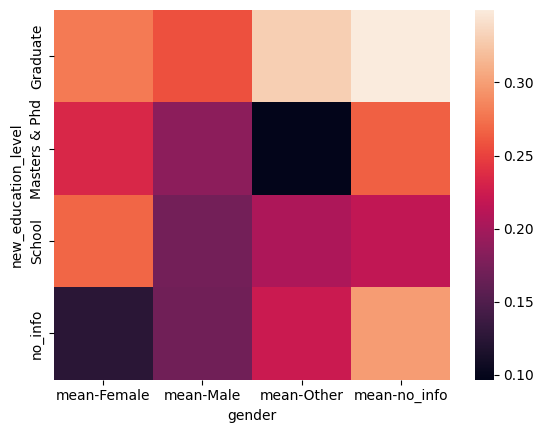

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(t)
plt.xlabel('gender') # добавляем метку для оси x
plt.ylabel('new_education_level') # добавляем метку для оси y
plt.show() # отображаем график

# !!! Смотри про CORRELATION & Phi K в файле 001 !!!

In [ ]:
# # Fhi k используется для общего представления.
# Проверка. Есть ли связь. С помощью сводных таблиц. Также смотри в файле 001

# Метод познания - игрушечные данные

In [75]:
# Создание игрушечных данных:

df = pd.DataFrame({'col1': [1,2,3, float('nan')], 
                   'col2': ['a', 'b', 'c', 'd'], 
                   'col3': [0, 0, 0, 1],
                  'col4': [0]*3 + [1]*1})

In [76]:
df

,col1,col2,col3,col4
0,1.0,a,0,0
1,2.0,b,0,0
2,3.0,c,0,0
3,NaN,d,1,1


In [ ]:
# Как работают функции агрегации с пропусками (на игрушечных данных показываем):

In [61]:
t = df = pd.DataFrame({'col1': [1,2,3, float('nan')]})

In [62]:
t

,col1
0,1.0
1,2.0
2,3.0
3,NaN


In [63]:
# применим к t функцию агрегации sum():

t['col1'].sum() # nan выбрасывается

6.0

In [65]:
# применим к t функцию агрегации mean():

t['col1'].mean() # nan выбрасывается

2.0

In [66]:
# применим к t функцию агрегации count():

t['col1'].count() # nan выбрасывается


3

In [70]:
t['col1'].size

4

In [71]:
len(t)

4

# Визуализация данных

<Axes: >

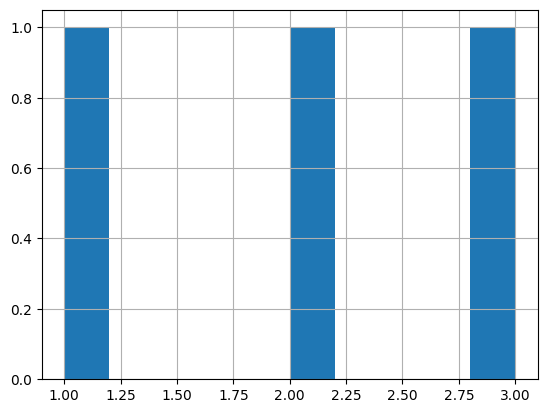

In [77]:
# Гистограмма распределения. Частотная диагармма

t['col1'].hist() # не учитывает nan !!!

In [78]:
t['col1'].value_counts() # тоже не видно пропуска

1.0    1
2.0    1
3.0    1
Name: col1, dtype: int64

In [80]:
# однако в отличае от hist - в value_counts - можно поставить dropna = False:

t['col1'].value_counts(dropna = False)

1.0    1
2.0    1
3.0    1
NaN    1
Name: col1, dtype: int64

<Axes: >

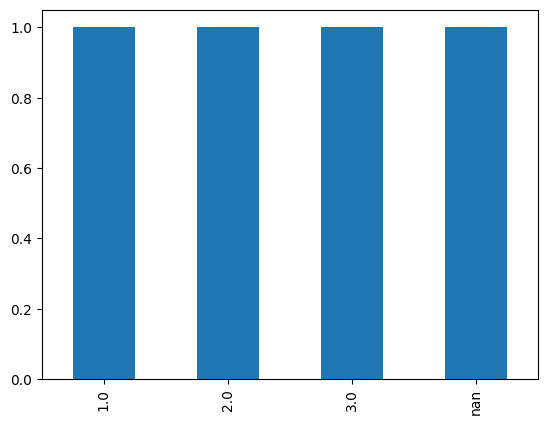

In [83]:
# и уже теперь строить гистограмму:
t['col1'].value_counts(dropna = False).plot(kind = 'bar')

# Скаттер

In [88]:
# на игрушечных данных:

df = pd.DataFrame({'x': [55,77,3,88,5,6], 'y': [6,7,8,94,3,46]})

In [89]:
df

,x,y
0,55,6
1,77,7
2,3,8
3,88,94
4,5,3
5,6,46


<Axes: xlabel='x', ylabel='y'>

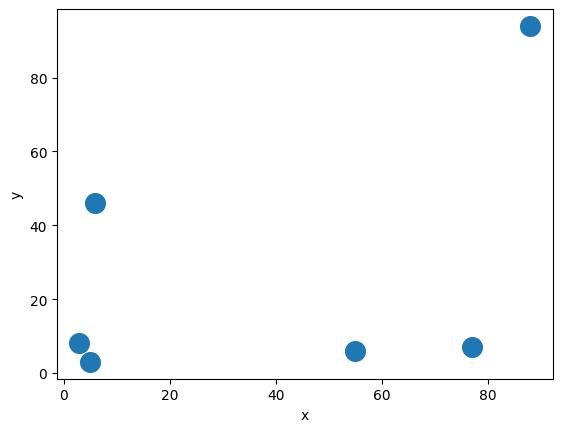

In [103]:
df.plot(x='x', y = 'y', kind = 'scatter', s = 200)

In [155]:
# возвращаемся к датасету с HR Analytics: Job Change of Data Scientists

df = pd.read_csv('archive_unzip/aug_train.csv')

In [129]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [130]:
df['experience'] = df['experience'].replace('>20', '21').replace('<1', 0).fillna('-1').astype('int64')

In [131]:
df['experience'].dtype

dtype('int64')

<Axes: xlabel='city_development_index', ylabel='experience'>

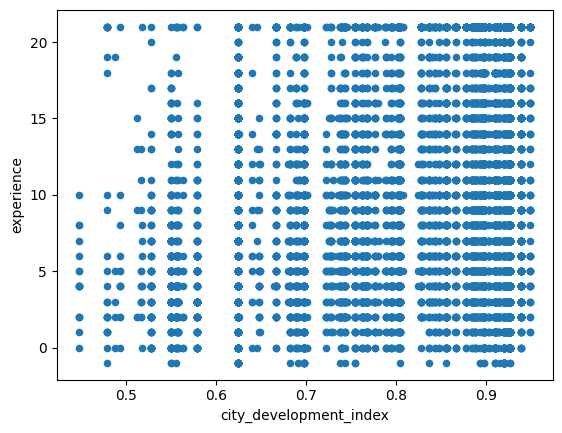

In [132]:
df.plot(x = 'city_development_index', y = 'experience', kind = 'scatter')

<Axes: xlabel='city_development_index', ylabel='experience'>

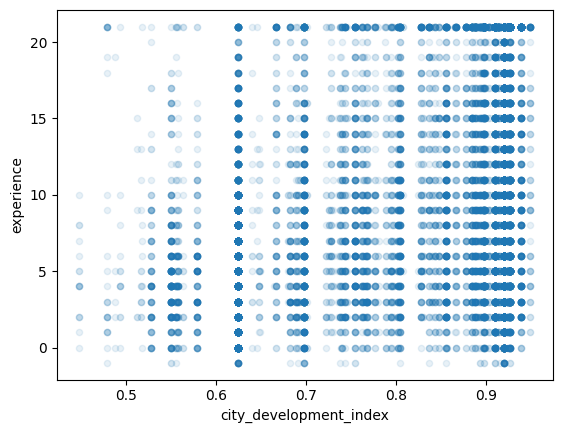

In [135]:
# зададим параметр альфа для настройки прозрачности точек, которые накладываются друг на друга

df.plot(x = 'city_development_index', y = 'experience', kind = 'scatter', alpha=0.1)

In [ ]:
# доверять скаттер плоту можно только после того, как проверили все в сводниках

In [139]:
t = pd.qcut(df['city_development_index'], 5, duplicates = 'drop')

In [141]:
df.groupby(t)['experience'].agg('mean')

city_development_index
(0.447, 0.691]     6.005169
(0.691, 0.878]     9.366867
(0.878, 0.92]     11.628011
(0.92, 0.949]     11.791880
Name: experience, dtype: float64

<Axes: xlabel='city_development_index'>

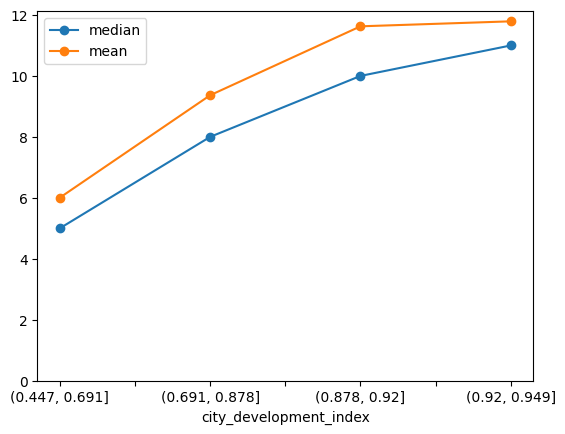

In [150]:
df.groupby(t)['experience'].agg(['median', 'mean']).plot(marker = 'o', ylim = 0)



# Join join JOIN !!!

In [ ]:
# Задача. Из другой таблицы добавить новый столбец age к каждому принявшему участие в опросе enrollee_id

In [158]:
df[['enrollee_id']]

,enrollee_id
0,8949
1,29725
2,11561
3,33241
4,666
...,...
19153,7386
19154,31398
19155,24576
19156,5756


In [164]:
# создаем новый датафрейм: 
# и не забываем сделать .copy()   - потому что это слайс df и может быть warning и изменения в самом df

age = df[['enrollee_id']].copy()   

In [165]:
age

,enrollee_id
0,8949
1,29725
2,11561
3,33241
4,666
...,...
19153,7386
19154,31398
19155,24576
19156,5756


In [166]:
age['age'] = 30

In [167]:
age

,enrollee_id,age
0,8949,30
1,29725,30
2,11561,30
3,33241,30
4,666,30
...,...,...
19153,7386,30
19154,31398,30
19155,24576,30
19156,5756,30


In [ ]:
# Чтобы подтянуть таблицу age в основной датафрейм df нужно делать JOIN

In [174]:
# В данном случае мы используем left join. Таким образом сохраянются все данные из df
# (если что-то нужно было бы зафильтровать, тогда используются другие join)

df.merge(age, how = 'left', on = 'enrollee_id')

# если столбцы в правой и левой таблице отличаются, то можно добавлять из какой таблицы мы берем название:
# df.merge(age, how = 'left', right_on = 'enrollee_id')
# df.merge(age, how = 'left', left_on = 'enrollee_id')

# также можно джойнить по нескольким ключам, например по дате и по id:
# df.merge(age, how = 'left', on = ['enrollee_id', 'date'])



# можно не писать по какому ключу джойнить датасеты. Для этого надо этим датасетам задать одинаковые индексы:
# df_set_index('enrollee_id')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,age_x,age_y
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,30,30
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,30,30
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,30,30
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,30,30
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,30,30
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,30,30
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,30,30
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,30,30


In [170]:
# Чтобы сохранить таблицу в df необходимо это прописать, иначе не сохранится

df = df.merge(age, how = 'left', on = 'enrollee_id')

In [ ]:
# ВАЖНО. Если enrollee_id повторяются - то новая колонка продублируется к каждому id/
# чтобы этого избежать: необходимо сравнивать исходный len(df) и len(df) с join'om

In [173]:
# Можно проверить на наличие дубликатов так:   
    
len(age['enrollee_id'].drop_duplicates())

19158

In [175]:
# Если всё же в одной таблице данные дублируются, необходимо предварительно сагрегировать данные так, чтобы 
# все id были уникальными 

# как это проверить: - необходимо сгруппировать, а затем проверить количество строк ---
                    #--- если есть повторения в id, при groupby они схлопнутся и df уменьшится 


age.groupby('enrollee_id').min()

,age
enrollee_id,
1,30
2,30
4,30
5,30
7,30
...,...
33375,30
33376,30
33377,30
